## CNN - Example 3
This code is from "Python - All in one for Dummies"

In [1]:
# this example uses the Fashion_MNIST data
# https://github.com/zalandoresearch/fashion-mnist 
# the images are 28x28

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image

C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

In [3]:
# Import Fashion MNIST
# note that onehotencoding is performed
# if you do not have the correct path, it downloads regular MNIST and not fashion dataset ?
fashion_mnist = input_data.read_data_sets('../cnn_example_3_data/fashion', one_hot=True)

fashion_mnist = tf.keras.datasets.fashion_mnist

# setup training and test datasets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# set descriptive names to the ten classes within the Fashion_MNIST data.
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# the images are gray-scale. We will normalize the values to [0-1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# prepare the training images
train_images = train_images.reshape(train_images.shape[0],28,28,1)

# prepare the test images
test_images = test_images.reshape(test_images.shape[0],28,28,1)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../cnn_example_3_data/fashion\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../cnn_example_3_data/fashion\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../cnn_example_3_data/fashion\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../cnn_example_3_data/fashion\t10k-labels-idx1-ubyte.gz
Instruction

In [4]:
# set the CNN model
model = tf.keras.Sequential()

# they are 28x28 images
input_shape = (28,28,1)

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(10, activation='softmax'))


# compile the model
# Sparse categorical crossentropy is a loss function used to measure the error between categories across the data set. 
# Categorical refers to the fact that the data has more than two categories (binary) in the data set. 
# Sparse refers to using a single integer to refer to classes (0–9, in our example). 
# Entropy (a measure of disorder) refers to the mix of data between the categories.
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# fit the model
history = model.fit(train_images, train_labels, epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 337s 6ms/sample - loss: 0.5980 - acc: 0.7910
Epoch 2/5
60000/60000 [==============================] - 335s 6ms/sample - loss: 0.3855 - acc: 0.8630
Epoch 3/5
60000/60000 [==============================] - 334s 6ms/sample - loss: 0.3408 - acc: 0.8803
Epoch 4/5
60000/60000 [==============================] - 336s 6ms/sample - loss: 0.3145 - acc: 0.8891
Epoch 5/5
60000/60000 [==============================] - 337s 6ms/sample - loss: 0.2932 - acc: 0.8959s - loss: 0.2931 - acc


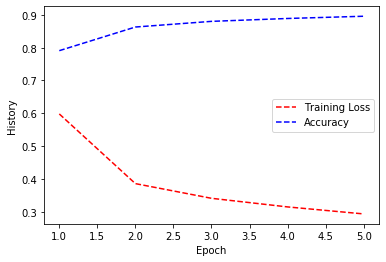

In [5]:
# Get training and test loss histories
training_loss = history.history['loss']
accuracy = history.history['acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(0)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, accuracy, 'b--')
plt.legend(['Training Loss', 'Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('History')
plt.show(block=False);
plt.pause(0.001)


In [6]:
# evaluate the model, test with 10,000 images to calculate the model score
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 9s 932us/sample - loss: 0.2553 - acc: 0.9054


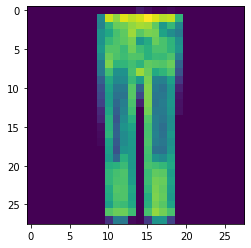

In [7]:
# now we will test the model using a single test image from Fashion_MNIST dataset
# run test image from Fashion_MNIST data
img = test_images[15]

plt.figure(1)
plt.imshow(img.reshape(28,28))
plt.show(block=False)
plt.pause(0.001)


In [8]:
# the predict() method expects the image in 4 dimensions. The 4th dimension is a batch.
# So we have one batch that consists of one image here. 
img = (np.expand_dims(img,0))

singlePrediction = model.predict(img,steps=1)
print ("Prediction Output")
print(singlePrediction)
print()

Prediction Output
[[1.1602458e-06 9.9996185e-01 3.2622675e-06 2.3707598e-06 5.0711928e-06
  2.3961632e-06 6.7738820e-06 1.0370747e-05 5.8658208e-07 6.1279502e-06]]



In [9]:
NumberElement = singlePrediction.argmax()
Element = np.amax(singlePrediction)
print ("Our Network has concluded that the image number '15' is a " +class_names[NumberElement])
print (str(int(Element*100)) + "% Confidence Level")
print('Test accuracy', test_acc)

Our Network has concluded that the image number '15' is a Trouser
99% Confidence Level
Test accuracy 0.9054


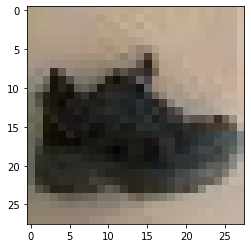

In [10]:
# now we will use an external image to test the model
# read test dress image
# the image is modified using Paint3D
# https://answers.microsoft.com/en-us/insider/forum/all/how-do-i-change-the-file-size-and-resolution-of-an/8c588a74-e32b-4986-a764-050511f82af6
imageName = "cnn_example_3_data/test_image1.jpg"
testImg = Image.open(imageName)

plt.figure(2)
plt.imshow(testImg)
plt.show(block=False)
plt.pause(0.001)


In [14]:
#testImg.load()

# the predict() method expects the image in 4 dimensions. The 4th dimension is a batch.
# So we have one batch that consists of one image here. 
testImg = (np.expand_dims(testImg,axis = 0))

data = np.asarray(testImg, dtype="float" )
data = tf.image.rgb_to_grayscale(data)
data = data/255.0
data = tf.transpose(data, perm=[3,0,1])


singlePrediction = model.predict(data,steps=1)
print ("Prediction Output")
print(singlePrediction)
print()

NumberElement = singlePrediction.argmax()
Element = np.amax(singlePrediction)
print ("Our Network has concluded that the file '" +imageName+"' is a "+class_names[NumberElement])
print (str(int(Element*100)) + "% Confidence Level")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'load'